<a href="https://colab.research.google.com/github/michaelsyao/AI_in_Finance/blob/main/08_recurrent_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## First Example

In [1]:
import os
import random
import numpy as np
import pandas as pd
import tensorflow as tf

from pprint import pprint
from pylab import plt, mpl

plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
pd.set_option('precision', 4)
np.set_printoptions(suppress=True, precision=4)
os.environ['PYTHONHASHSEED'] = '0'

In [2]:
def set_seeds(seed=100):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
set_seeds()

In [3]:
a = np.arange(100)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [4]:
a = a.reshape((len(a), -1))

In [5]:
a.shape

(100, 1)

In [6]:
a[:5]

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [7]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [8]:
TimeseriesGenerator?

In [47]:
data = np.array([[i] for i in range(16)])
targets = np.array([[i] for i in range(16)])

In [48]:
data_gen = TimeseriesGenerator(data, targets,
                               length = 10, sampling_rate=2,
                               batch_size=2)
pprint(list(data_gen))

[(array([[[0],
        [2],
        [4],
        [6],
        [8]],

       [[1],
        [3],
        [5],
        [7],
        [9]]]),
  array([[10],
       [11]])),
 (array([[[ 2],
        [ 4],
        [ 6],
        [ 8],
        [10]],

       [[ 3],
        [ 5],
        [ 7],
        [ 9],
        [11]]]),
  array([[12],
       [13]])),
 (array([[[ 4],
        [ 6],
        [ 8],
        [10],
        [12]],

       [[ 5],
        [ 7],
        [ 9],
        [11],
        [13]]]),
  array([[14],
       [15]]))]


In [49]:
data_gen = TimeseriesGenerator(data, targets,
                               length = 10, sampling_rate=3,
                               batch_size=2)
pprint(list(data_gen))

[(array([[[ 0],
        [ 3],
        [ 6],
        [ 9]],

       [[ 1],
        [ 4],
        [ 7],
        [10]]]),
  array([[10],
       [11]])),
 (array([[[ 2],
        [ 5],
        [ 8],
        [11]],

       [[ 3],
        [ 6],
        [ 9],
        [12]]]),
  array([[12],
       [13]])),
 (array([[[ 4],
        [ 7],
        [10],
        [13]],

       [[ 5],
        [ 8],
        [11],
        [14]]]),
  array([[14],
       [15]]))]


In [50]:
lags = 3

In [51]:
g = TimeseriesGenerator(a, a, length=lags, batch_size=5)

In [52]:
pprint(list(g)[0])

(array([[[0],
        [1],
        [2]],

       [[1],
        [2],
        [3]],

       [[2],
        [3],
        [4]],

       [[3],
        [4],
        [5]],

       [[4],
        [5],
        [6]]]),
 array([[3],
       [4],
       [5],
       [6],
       [7]]))


In [53]:
(list(g)[0][0]).shape # A 3D tensor, with shape [samples in each batch, timesteps, features]

(5, 3, 1)

In [54]:
from keras.models import Sequential
from keras.layers import SimpleRNN, LSTM, Dense

In [55]:
model = Sequential()
model.add(SimpleRNN(100, activation='relu',
                    input_shape=(lags, 1)))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adagrad', loss='mse',
              metrics=['mae'])

In [56]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 100)               10200     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 10,301
Trainable params: 10,301
Non-trainable params: 0
_________________________________________________________________


In [57]:
# Dimension
# 1 of (3,1)
# (1+1)*100 + 100*100 = 10200
# (100+1)*1 = 101

In [58]:
%%time
h = model.fit(g, epochs=1000, steps_per_epoch=5,
            verbose=False)

CPU times: user 44.4 s, sys: 1.7 s, total: 46.1 s
Wall time: 52.9 s


In [59]:
# we only put g into the formula

In [60]:
res = pd.DataFrame(h.history)

In [61]:
res.tail(3)

,loss,mae
997,0.9138,0.7862
998,0.4042,0.5765
999,0.5702,0.6318


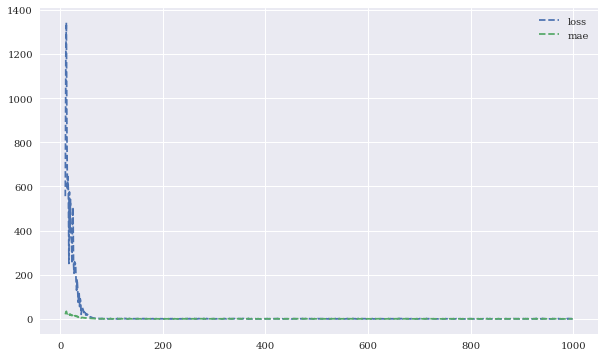

In [62]:
res.iloc[10:].plot(figsize=(10, 6), style=['--', '--']);

In [63]:
x = np.array([21, 22, 23]).reshape((1, lags, 1))
y = model.predict(x, verbose=False)
int(round(y[0, 0]))

23

In [64]:
x = np.array([87, 88, 89]).reshape((1, lags, 1))
y = model.predict(x, verbose=False)
int(round(y[0, 0]))

91

In [65]:
x = np.array([187, 188, 189]).reshape((1, lags, 1))
y = model.predict(x, verbose=False)
int(round(y[0, 0]))

193

In [66]:
x = np.array([1187, 1188, 1189]).reshape((1, lags, 1))
y = model.predict(x, verbose=False)
int(round(y[0, 0]))

1222

## Second Example

In [67]:
def transform(x):
    y = 0.05 * x ** 2 + 0.2 * x + np.sin(x) + 5
    y += np.random.standard_normal(len(x)) * 0.2
    return y

In [68]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 500)
a = transform(x)

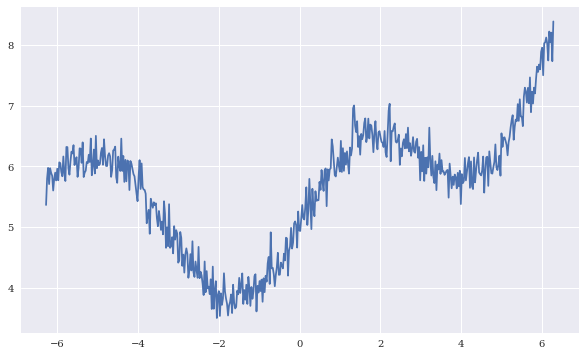

In [69]:
plt.figure(figsize=(10, 6))
plt.plot(x, a);

In [82]:
a = a.reshape((len(a), -1))
a.shape

(500, 1)

In [71]:
a[:5]

array([[5.3673],
       [5.8002],
       [5.9768],
       [5.7102],
       [5.9715]])

In [72]:
lags = 5

In [73]:
g = TimeseriesGenerator(a, a, length=lags, batch_size=5)

In [74]:
model = Sequential()

model.add(SimpleRNN(500, activation='relu', input_shape=(lags, 1)))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [75]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 500)               251000    
                                                                 
 dense_2 (Dense)             (None, 1)                 501       
                                                                 
Total params: 251,501
Trainable params: 251,501
Non-trainable params: 0
_________________________________________________________________


In [83]:
# (1+1)*500 +500*500 = 251000
#(500+1)*1 = 501

In [76]:
%%time
model.fit(g, epochs=500,
          steps_per_epoch=10,
          verbose=False)

CPU times: user 1min 43s, sys: 8.08 s, total: 1min 51s
Wall time: 1min 26s


In [77]:
x = np.linspace(-6 * np.pi, 6 * np.pi, 1000)
d = transform(x)

In [78]:
g_ = TimeseriesGenerator(d, d, length=lags, batch_size=len(d))

In [85]:
len(list(g_))
list(g_)

[(array([[19.1706, 19.4008, 19.2016, 18.8897, 19.2257],
         [19.4008, 19.2016, 18.8897, 19.2257, 18.5908],
         [19.2016, 18.8897, 19.2257, 18.5908, 19.6125],
         ...,
         [25.7457, 26.0779, 25.9117, 25.9159, 26.1981],
         [26.0779, 25.9117, 25.9159, 26.1981, 26.3752],
         [25.9117, 25.9159, 26.1981, 26.3752, 26.5049]]),
  array([18.5908, 19.6125, 19.43  , 18.9547, 18.5864, 18.7631, 18.8504,
         18.7521, 18.7945, 18.837 , 18.4949, 18.5906, 18.5169, 18.545 ,
         18.6086, 18.0556, 18.4269, 18.7201, 18.2545, 18.1107, 18.1251,
         18.3644, 17.824 , 18.1864, 17.4579, 18.3619, 17.9994, 18.2414,
         17.8104, 17.9298, 18.3062, 17.5739, 17.9135, 17.2283, 17.1018,
         17.7018, 17.5161, 17.3508, 17.3896, 17.2279, 17.3306, 17.3622,
         17.3413, 17.0821, 17.1762, 17.0822, 16.9544, 16.7037, 16.1843,
         16.6239, 16.5421, 16.1941, 16.5969, 16.3646, 16.0147, 16.3789,
         16.2843, 16.2809, 15.731 , 15.9894, 15.6302, 15.1399, 15.5246,


In [86]:
list(g_)[0][0].shape # first [0] is batch one
                     # second [0] is x

(995, 5)

In [88]:
f = list(g_)[0][0].reshape((len(d) - lags, lags, 1))
f

array([[[19.1706],
        [19.4008],
        [19.2016],
        [18.8897],
        [19.2257]],

       [[19.4008],
        [19.2016],
        [18.8897],
        [19.2257],
        [18.5908]],

       [[19.2016],
        [18.8897],
        [19.2257],
        [18.5908],
        [19.6125]],

       ...,

       [[25.7457],
        [26.0779],
        [25.9117],
        [25.9159],
        [26.1981]],

       [[26.0779],
        [25.9117],
        [25.9159],
        [26.1981],
        [26.3752]],

       [[25.9117],
        [25.9159],
        [26.1981],
        [26.3752],
        [26.5049]]])

In [80]:
y = model.predict(f, verbose=False)

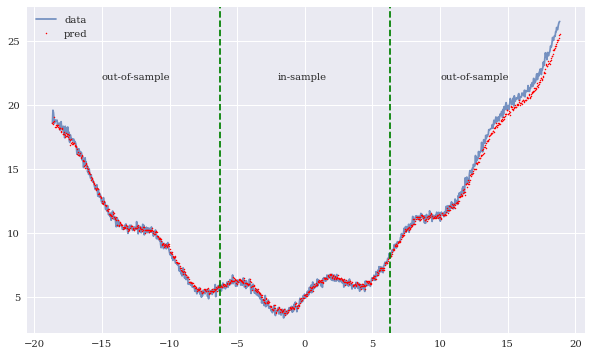

In [81]:
plt.figure(figsize=(10, 6))

plt.plot(x[lags:], d[lags:], label='data', alpha=0.75)
plt.plot(x[lags:], y, 'r.', label='pred', ms=3)

plt.axvline(-2 * np.pi, c='g', ls='--')
plt.axvline(2 * np.pi, c='g', ls='--')

plt.text(-15, 22, 'out-of-sample')
plt.text(-2, 22, 'in-sample')
plt.text(10, 22, 'out-of-sample')
plt.legend();

In [91]:
d = d.reshape (len(d), -1)
g_ = TimeseriesGenerator(d, d, length = lags, batch_size = 5)
y_ = model.predict(g_,  verbose = False)

In [92]:
y_.shape

(995, 1)

In [94]:
(y != y_).sum()

10